In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

In [2]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()

In [3]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
X_reduced = pca.transform(X)
print("Reduced dataset shape: ", X_reduced.shape)

Reduced dataset shape:  (150, 2)


Meaning of the 2 components: 
0.362 sepal length (cm)+-0.082 sepal width (cm)+0.857 petal length (cm)+0.359 petal width (cm)
0.657 sepal length (cm)+0.730 sepal width (cm)+-0.176 petal length (cm)+-0.075 petal width (cm)


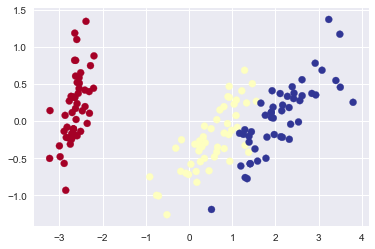

In [5]:
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
          cmap='RdYlBu')
print("Meaning of the 2 components: ")
for component in pca.components_:
    print("+".join("%.3f %s" % (value, name)
                  for value, name in zip(component,
                                        iris.feature_names)))

In [6]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)

In [7]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [8]:
y_pred = k_means.predict(X)

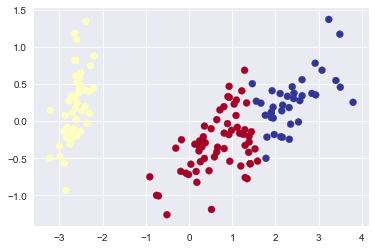

In [9]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred,
           cmap='RdYlBu')

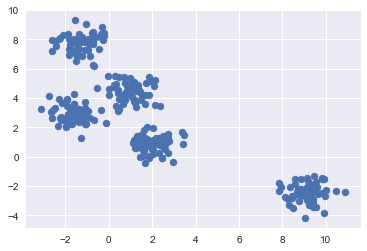

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=5,
                 random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

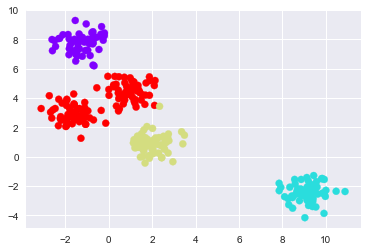

In [12]:
from sklearn.cluster import KMeans
est = KMeans(4)
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='rainbow')